# MGT-499 Statistics and Data Science - Individual Assignment

In [6]:
# Importing all the libraries I am using
import numpy as np
import pandas as pd
import os #We import os in order to change/specify our working directory.
import plotly.express as px #interractive boxplot
import matplotlib.pyplot as plt 
import seaborn as sb # visualization extension
#import bokeh.io # for more visual demonstration
#import bokeh.models #for more visual demonstration
#import bokeh.plotting #for more visual demonstration


This notebook contains the individual assignment for the class MGT-499 Statistics and Data Science. Important information:
- **Content**: the assignment is divided in two main parts, namely data cleaning (2 datasets) and Exploratory Data Analysis, for a total of 13 main questions (see table of contents). Some of these main questions are divided in sub questions. In the first part, the questions are very specific, while in the second part they are more open.
- **Deadline**: Tuesday 8th of November at 23:59. 
- **Final Output**: a Jupyter notebook, which we (teachers) can run. 
- **Answering the Questions**: you will find the questions in markdown cells below. Under each of these cells, you will find a cell / cells for answers. Type there your answer. For the answer to be correct, the cell with the answer must run without error (unless specified). You can use markdown cells for the answers that require text.
- **Submission**: submit the assignment on Moodle, under [Individual Assignment](https://moodle.epfl.ch/mod/assign/view.php?id=1222846)

## Content
- [Polity5 Dataset](#polity5)  
    - [Question 1: Import the data and get a first glance](#question1)
    - [Question 2: Select some variables](#question2)
    - [Question 3: Missing Values](#question3)
    - [Question 4: Check Polity2](#question4)
- [Quality of Government (QOG) Environmental Indicators Dataset](#qog)  
    - [Question 5: Import the data and do few fixes](#question5)
    - [Question 6: Merge QOG and Polity5 ... first attempt](#question6)
    - [Question 7: Merge QOG and Polity5 ... second attempt](#question7)
    - [Question 8: Clean the merged dataframe](#question8)
- [Exploratory Data Analysis](#eda)
    - [Question 9: Selecting the ingredients for the recipe (how I select the variables)](#question9)  
    - [Question 10: Picking the right quantity of each ingredient (how I select my sample)](#question10)
    - [Question 11: Tasting and preparing the ingredients (univariate analysis)](#question11)
    - [Question 12: Cooking the ingredients together (bivariate analysis)](#question12)
    - [Question 13: Tasting the new recipe (conclusion)](#question13)

## Polity5 data <a class="anchor" id="polity5"></a>

Polity5 is a widely used democracy scale. The raw data as well as the codebook are available [here](http://www.systemicpeace.org/inscrdata.html). For this assignment, we have modified a bit the original version, for example we have added the iso3 code for countries to make you save time. You can find the modified version [here](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/data/polity2_iso3.csv).

### Question 1: import the data and get a first glance <a class="anchor" id="question1"></a>

1a) Import the csv 'polity2_iso3.csv' (file provided in the link [here](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/data/polity2_iso3.csv)) as a panda dataframe (ignore the warning message) **(1 point)**

In [7]:
url = "https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/data/polity2_iso3.csv"
data = pd.read_csv(url,low_memory=False)  #use low memeory false since there are different datatypes in the same column -> gets rid of the warning message
type(data)

pandas.core.frame.DataFrame

1b) Display the first 10 rows **(1 point)**

In [8]:
data.head(10) #with the head function I can decide how many rows I want to display - here I explore the first 10 rows

iso3  year  p5    cyear  ccode scode       country  flag  fragment  democ  \
0  NaN  1800   0  2711800    271   WRT  Wuerttemburg     0       NaN      0   
1  NaN  1800   0  7301800    730   KOR         Korea     0       NaN      5   
2  NaN  1800   0  2451800    245   BAV       Bavaria     0       NaN      0   
3  NaN  1801   0  7301801    730   KOR         Korea     0       NaN      5   
4  NaN  1801   0  2711801    271   WRT  Wuerttemburg     0       NaN      0   
5  NaN  1801   0  2451801    245   BAV       Bavaria     0       NaN      0   
6  NaN  1802   0  7301802    730   KOR         Korea     0       NaN      5   
7  NaN  1802   0  2711802    271   WRT  Wuerttemburg     0       NaN      0   
8  NaN  1802   0  2451802    245   BAV       Bavaria     0       NaN      0   
9  NaN  1803   0  7301803    730   KOR         Korea     0       NaN      5   

   ...  interim  bmonth  bday byear  bprec  post  change   d5   sf  regtrans  
0  ...      NaN       1     1  1800      1    -7      88    1  NaN       NaN  
1  ...      NaN       1     1  1800      1     1      88    1  NaN       NaN  
2  ...      NaN       1     1  1800      1   -10      88    1  NaN       NaN  
3  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  
4  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  
5  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  
6  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  
7  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  
8  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  
9  ...      NaN     NaN   NaN   NaN    NaN   NaN     NaN  NaN  NaN       NaN  

[10 rows x 38 columns]

1c) Display the data types of all the variables included in the data **(1 point)**

In [9]:
data.dtypes #shows the data type of each column  


iso3         object
year          int64
p5            int64
cyear         int64
ccode         int64
scode        object
country      object
flag          int64
fragment    float64
democ         int64
autoc         int64
polity        int64
polity2     float64
durable      object
xrreg         int64
xrcomp        int64
xropen        int64
xconst        int64
parreg        int64
parcomp       int64
exrec       float64
exconst       int64
polcomp     float64
prior        object
emonth       object
eday         object
eyear        object
eprec        object
interim      object
bmonth       object
bday         object
byear        object
bprec        object
post         object
change       object
d5           object
sf           object
regtrans     object
dtype: object

1d) By looking at your answer in 1c, what is the difference between the different types of variables? Why the type of some variables is defined as object? **(1 point)**

My data shows three different types of variables: 
- **object** -> instead of a **string** as when using python it shows me **object** since I am using panda - the datatype object refers to strings, as well as mixed columns of numeric characters and strings
- **int64** -> the column holds only numeric characters - with memory size of 64 bits
- **float64** -> the column holds numeric characters, as well as blanks like "NaN" - with memory size of 64 bits


### Question 2. Select some variables <a class="anchor" id="question2"></a>

2a) Create a subset dataframe that contains the variables 'iso3', 'country', 'year', 'polity2' and display it **(1 point)**

In [10]:
# 2a subset creation for iso3', 'country', 'year', 'polity2

subset_1 = data.loc[:,["iso3","country","year","polity2"]]
print(subset_1)

      iso3       country  year  polity2
0      NaN  Wuerttemburg  1800     -7.0
1      NaN         Korea  1800      1.0
2      NaN       Bavaria  1800    -10.0
3      NaN         Korea  1801      1.0
4      NaN  Wuerttemburg  1801     -7.0
...    ...           ...   ...      ...
17569  ZWE      Zimbabwe  2014      4.0
17570  ZWE      Zimbabwe  2015      4.0
17571  ZWE      Zimbabwe  2016      4.0
17572  ZWE      Zimbabwe  2017      4.0
17573  ZWE      Zimbabwe  2018      4.0

[17574 rows x 4 columns]


2b) Display the type of the variable "year" **(1 point)**

In [11]:
# 2b displaying the type of the single column "year"

subset_1["year"].dtypes

dtype('int64')

2c) Convert the variable "year" to string **(1 point)**
<br>
Hint: if you get a warning message of the type "SettingWithCopyWarning", it is because you did not subset the data in the right way. Go back to your class notes and check the different ways to subset a dataframe, and try again. If you do it correctly, you will not get the warning message.

In [12]:
#  2c convertign integer into string/ object since I am using panda

subset_1["year"]=subset_1["year"].astype(str) 
print(subset_1.dtypes)# checking if my operation worked


iso3        object
country     object
year        object
polity2    float64
dtype: object


### Question 3: Missing Values <a class="anchor" id="question3"></a>

3a) Subset the rows that have iso3 missing and display **(1 point)**

In [13]:
#  3a subsetting missing iso3 

idx = subset_1["iso3"].isna() #isna() shows all the rows where there is no data/NaN's 
subset_iso3 = subset_1.loc[idx] #creating a new subset_iso3 from my subset_1 with missing iso3 

print(subset_iso3) #checking if the operation worked
subset_iso3 = subset_iso3.copy() # creating a copy to explore different behavior in the data

     iso3       country  year  polity2
0     NaN  Wuerttemburg  1800     -7.0
1     NaN         Korea  1800      1.0
2     NaN       Bavaria  1800    -10.0
3     NaN         Korea  1801      1.0
4     NaN  Wuerttemburg  1801     -7.0
...   ...           ...   ...      ...
1272  NaN    Montenegro  2018      9.0
1273  NaN   Sudan-North  2018     -4.0
1274  NaN       Vietnam  2018     -7.0
1275  NaN      Ethiopia  2018      1.0
1276  NaN        Serbia  2018      8.0

[1270 rows x 4 columns]


3b) Display the countries that have missing iso3. What can you tell by looking at them? Any similarities? **(1 point)**

In [14]:
# 3b countries with missing iso3

print(subset_iso3.country.unique())


['Wuerttemburg' 'Korea' 'Bavaria' 'Saxony' 'Parma' 'Tuscany' 'Sardinia'
 'Modena' 'Two Sicilies' 'Baden' 'Gran Colombia' 'United Province CA'
 'Serbia' 'Orange Free State' 'Yemen North' 'Czechoslovakia' 'USSR'
 'Germany West' 'Germany East' 'Pakistan' 'South Vietnam' 'Yemen South'
 'Vietnam' 'Yugoslavia' 'Ethiopia' 'Serbia and Montenegro' 'Montenegro'
 'Sudan-North']


These countries show the same pattern that they had historical changes - either on their country name or their country boarders. We can conclude three different groups: 
- One group shows that the countries are part of a current country. For example: Bavaria or Saxony are states within Germany, while Tuscany is within Italy 
- Another group shows countries that were merged to one country like Germany West and Germany East
- The third group is comprised of countries that were split in the past. For example Czechoslovakia which split into Czech Republic and Slovakia, as well as Yugoslavia which split into six different countries including Montenegro, Serbia, ...


3c) Display the countries with missing iso3 from 2011. **(1 point)**

In [15]:
#  3c displaying all countries of 2011 onwards without iso code

subset_iso3["year"] = subset_iso3["year"].astype(int) #transform year into interger so it can be read as a numerical number -> needed for comaprison <,>,=
subset_iso3[(subset_iso3["iso3"].isna() & (subset_iso3["year"] >2010))].country.unique()  #unique() display an array of all unique varibales within the conditioned dataframe
     

array(['Montenegro', 'Serbia', 'Ethiopia', 'Sudan-North', 'Vietnam'],
      dtype=object)

3d) Display the rows for which the column "country" contains the word "Serbia". By looking at the result, can you tell what happened to Serbia in 2006? **(1 point)**
<br>
Hint: the most general way of doing this is to use a combination of re.search and list comprehension. To display the full subset, you can use print(df.to_string()).

In [16]:
# 3d Serbia deep dive in

idx=subset_iso3["country"].str.contains("Serbia") #str.contains() is the panda way for searching for a word within in a dataframe
subset_serbia=subset_iso3.loc[idx] #extract Serbia from my subset_dataset

print(subset_serbia[(subset_serbia["year"] == 2006) & (subset_serbia["country"]== "Serbia")]) #only selecting Serbia in 2006 to analyze
print(subset_serbia.to_string()) #see bigger picture to compare before and after the annexion


     iso3 country  year  polity2
1213  NaN  Serbia  2006      8.0
     iso3                country  year  polity2
224   NaN                 Serbia  1830     -7.0
230   NaN                 Serbia  1831     -7.0
252   NaN                 Serbia  1832     -7.0
261   NaN                 Serbia  1833     -7.0
272   NaN                 Serbia  1834     -7.0
286   NaN                 Serbia  1835     -7.0
295   NaN                 Serbia  1836     -7.0
301   NaN                 Serbia  1837     -7.0
318   NaN                 Serbia  1838      2.0
333   NaN                 Serbia  1839      2.0
344   NaN                 Serbia  1840      2.0
357   NaN                 Serbia  1841      2.0
363   NaN                 Serbia  1842      2.0
369   NaN                 Serbia  1843      2.0
387   NaN                 Serbia  1844      2.0
394   NaN                 Serbia  1845      2.0
410   NaN                 Serbia  1846      2.0
420   NaN                 Serbia  1847      2.0
429   NaN             

-> In 2006 Serbia and Montenegro were split from another - Montenegro was annexed of Serbia and Serbian's polity factor jumped from 6 to 8.

3e) Write a function that does the operation in 3d and use it to display the subset that has the word "sudan" (all lower cap) in country. Then do the same for the word "vietnam" (all lower cap). **(1 point)**
<br>
Hint: options of functions can be very useful.

In [17]:
# 3e creating a function to search for data by countries
def subsetting_country(subset,country_name):
    idx = subset["country"].str.contains(country_name , case=False) #the case is an option for my function contains, so of the country_name doesn't matter
    return subset.loc[idx] #same as in 3d, but additionally I am defining with "case" the input acceptance of lower letters
print (subsetting_country(subset_1,"sudan")) #outputting countries that contain "sudan"
print (subsetting_country(subset_1,"vietnam")) #outputting countries that contain "vietnam"


      iso3      country  year  polity2
1232   SSD  South Sudan  2011      0.0
1234   NaN  Sudan-North  2011     -4.0
1237   SSD  South Sudan  2012      0.0
1241   NaN  Sudan-North  2012     -4.0
1244   NaN  Sudan-North  2013     -4.0
...    ...          ...   ...      ...
14682  SDN        Sudan  2007     -3.0
14683  SDN        Sudan  2008     -3.0
14684  SDN        Sudan  2009     -3.0
14685  SDN        Sudan  2010     -2.0
14686  SDN        Sudan  2011     -2.0

[72 rows x 4 columns]
      iso3        country  year  polity2
912    NaN  South Vietnam  1955     -3.0
917    NaN  South Vietnam  1956     -3.0
921    NaN  South Vietnam  1957     -3.0
928    NaN  South Vietnam  1958     -3.0
936    NaN  South Vietnam  1959     -3.0
...    ...            ...   ...      ...
17337  VNM  Vietnam North  1972     -7.0
17338  VNM  Vietnam North  1973     -7.0
17339  VNM  Vietnam North  1974     -7.0
17340  VNM  Vietnam North  1975     -7.0
17341  VNM  Vietnam North  1976     -7.0

[87 rows x 4 col

3f) Replace nan values in iso3 with correct iso3 for the 5 countries found in 3c from 2011 onwards, and display the subset with the fixed values to check that everything worked. **(1 point)**
<br>
Hint: the correct iso3 for these 5 countries are "ETH","MNE","SRB","SDN","VNM".

In [18]:
# 3f  correcting iso codes

def iso_match(subset, countries, date=2011): #creating a function
    #looping through the index of subset
    for i in subset.index:
        for idx,country in enumerate(countries): # now we loop through the dictionary
            if subset.loc[i,'country'] == country and subset.loc[i,"year"] >= date:
                subset.loc[i,'iso3'] = countries[country]
    return subset

subset_1["year"] = subset_1["year"].astype(int)
countries = {"Ethiopia":"ETH","Montenegro":"MNE","Serbia":"SRB","Vietnam":"VNM"}
subset_1 = iso_match(subset_1,countries,date=2011)

print(subset_1.to_string())
print (subsetting_country(subset_1,"Montenegro")) #quick check if it changed the ISO code

      iso3                           country  year  polity2
0      NaN                      Wuerttemburg  1800     -7.0
1      NaN                             Korea  1800      1.0
2      NaN                           Bavaria  1800    -10.0
3      NaN                             Korea  1801      1.0
4      NaN                      Wuerttemburg  1801     -7.0
5      NaN                           Bavaria  1801    -10.0
6      NaN                             Korea  1802      1.0
7      NaN                      Wuerttemburg  1802     -7.0
8      NaN                           Bavaria  1802    -10.0
9      NaN                             Korea  1803      1.0
10     NaN                           Bavaria  1803    -10.0
11     NaN                      Wuerttemburg  1803     -7.0
12     NaN                           Bavaria  1804    -10.0
13     NaN                             Korea  1804      1.0
14     NaN                      Wuerttemburg  1804     -7.0
15     NaN                      Wuerttem

3g) Drop the remaining rows which have nan in "iso3" and display the new number of rows of the dataframe (how many are they?) **(1 point)**

In [19]:
# 3g dropping NaN rows

subset_1_clean=subset_1.dropna(subset=["iso3"]) #dropping NaN for missing iso3

print(subset_1_clean) #there are 16336 rows


      iso3      country  year  polity2
1230   MNE   Montenegro  2011      9.0
1231   SRB       Serbia  2011      8.0
1232   SSD  South Sudan  2011      0.0
1233   ETH     Ethiopia  2011     -3.0
1235   VNM      Vietnam  2011     -7.0
...    ...          ...   ...      ...
17569  ZWE     Zimbabwe  2014      4.0
17570  ZWE     Zimbabwe  2015      4.0
17571  ZWE     Zimbabwe  2016      4.0
17572  ZWE     Zimbabwe  2017      4.0
17573  ZWE     Zimbabwe  2018      4.0

[16336 rows x 4 columns]


### Question 4: Check Polity2 <a class="anchor" id="question4"></a>

4a) Display the first and last year included in the dataset **(1 point)**

In [20]:
# 4a first and last year in dataframe

Max= subset_1_clean["year"].loc[subset_1_clean["year"].idxmax()]
Min= subset_1_clean["year"].loc[subset_1_clean["year"].idxmin()]

print("The first year in my dataset is", Min)
print("The last year in my dataset is",Max)



The first year in my dataset is 1776
The last year in my dataset is 2020


4b) What do the values in "polity2" represent? **(1 point)**

Polity is computed by subtracting the AUTOC score from the DEMOC score. The resulting polity scale ranges from +10, which is strongly democratic to -10
(strongly autocratic).
Polity2 is the revised version of polity and includes information on how to deal with countries in their "transition state".

4c) Do we have weird values for polity2? If yes, why? What should we do about them? Transform the data accordingly. **(1 point)**

Weird values for polity2 is anything that is outside the range of [-10,10]. Therefore we have to do the following: 
- **-66** Cases of foreign “interruption” are treated as “system missing.”
- **-77** Cases of “interregnum,” or anarchy, are converted to a “neutral” -> polity2 = 0.
- **-88** Countries are in “transition” and therefore must be calculated over the timespan of the transition. Ongoing -88 values are converted to missing values.


In [21]:
# 4c changing polity2 ofcountry with transitioning polity values to 0

def clean_polity2(subset):
#   subset_2_clean= subset.copy() 
    count = sum(abs(subset.polity2) > 10) # take the absolute value, -> getting rig of minus and filtering for values outside of [-10,10]
    print('We have',count, 'weird values outside the normal range.')
    if count > 0:
        uni = subset.polity2.unique() # unique values for polity2
        print (uni)
        if -66 in uni:
            print('-66')
            subset["polity2"].replace(-66,0,inplace=True)  # convert -66 to 0           
        if -77 in uni:
            print('-77')
            subset["polity2"].replace(-77,0,inplace=True)  # convert -77 to 0
        if -88 in uni:
            print('-88')
            subset["polity2"].replace(-88,0,inplace=True)  # convert -88 to 0        
    return subset

subset_1_clean = clean_polity2(subset_1_clean) #changing my subset according to the function 

print (subset_1_clean.to_string())

We have 5 weird values outside the normal range.
[  9.   8.   0.  -3.  -7.   1.  -6.  -8. -10.  nan  -1.  -4.  -2.  -9.
  -5.   3.   5.   7.   2.   6.  10.   4. -88. -66.]
-66
-88


C:\Users\Charlotte Ahrens\AppData\Local\Temp\ipykernel_29096\856256858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["polity2"].replace(-66,0,inplace=True)  # convert -66 to 0
C:\Users\Charlotte Ahrens\AppData\Local\Temp\ipykernel_29096\856256858.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["polity2"].replace(-88,0,inplace=True)  # convert -88 to 0


      iso3                           country  year  polity2
1230   MNE                        Montenegro  2011      9.0
1231   SRB                            Serbia  2011      8.0
1232   SSD                       South Sudan  2011      0.0
1233   ETH                          Ethiopia  2011     -3.0
1235   VNM                           Vietnam  2011     -7.0
1236   MNE                        Montenegro  2012      9.0
1237   SSD                       South Sudan  2012      0.0
1238   SRB                            Serbia  2012      8.0
1239   ETH                          Ethiopia  2012     -3.0
1240   VNM                           Vietnam  2012     -7.0
1242   VNM                           Vietnam  2013     -7.0
1243   MNE                        Montenegro  2013      9.0
1245   ETH                          Ethiopia  2013     -3.0
1246   SSD                       South Sudan  2013      0.0
1247   SRB                            Serbia  2013      8.0
1248   SRB                            Se

4d) Make a map that shows the number of observations of polity2 by country **(1 point)**

In [22]:
# 4d  visualization of # observations of polity2 by country 

map_gps = px.choropleth(
    subset_1_clean,                                 # dataframe as argument
    locations="country",                       # column name with location
    locationmode="country names",              #location based on country name column    
    color="polity2",                       # color countries with ploity2 value
    color_continuous_scale=px.colors.sequential.Plasma,   # choice of color
)
map_gps.update_layout( 
    title={                                # adding a title, centered on top
        'text': "Polity2 by country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
map_gps.show()



4e) Store the final dataframe (the one you obtained after 4d) in an object called df_pol **(1 point)**

In [23]:
# 4e storing dataframe in new object

df_pol = subset_1_clean
print(df_pol)



      iso3      country  year  polity2
1230   MNE   Montenegro  2011      9.0
1231   SRB       Serbia  2011      8.0
1232   SSD  South Sudan  2011      0.0
1233   ETH     Ethiopia  2011     -3.0
1235   VNM      Vietnam  2011     -7.0
...    ...          ...   ...      ...
17569  ZWE     Zimbabwe  2014      4.0
17570  ZWE     Zimbabwe  2015      4.0
17571  ZWE     Zimbabwe  2016      4.0
17572  ZWE     Zimbabwe  2017      4.0
17573  ZWE     Zimbabwe  2018      4.0

[16336 rows x 4 columns]


## Quality of Government Environmental Indicators <a class="anchor" id="qog"></a>

The QoG Environmental Indicators dataset (QoG-EI) (Povitkina, Marina, Natalia Alvarado Pachon & Cem Mert Dalli. 2021). The Quality of Government Environmental Indicators Dataset, version Sep21. University of Gothenburg: The Quality of Government Institute, https://www.gu.se/en/quality-government), is a compilation of indicators measuring countries' environmental performance over time, including the presence and stringency of environmental policies, environmental outcomes (emissions, deforestation, etc.), and public opinion on the environment. Codebook and data are available [here](https://www.gu.se/en/quality-government/qog-data/data-downloads/environmental-indicators-dataset).

### Question 5: Import the data and do few fixes <a class="anchor" id="question5"></a>

5a) Import data from the Quality of Government Environmental Indicators Dataset and display the variables types and the number of rows **(1 point)**
<br>
Hint: When you go on the webpage of the Environmental Indicators Dataset, you can directly import from a URL by copying the link address of the dataset! 

In [28]:
# 5a importing new data set
url_2 = "https://www.qogdata.pol.gu.se/data/qog_ei_sept21.csv"
df_quality = pd.read_csv(url_2,encoding="latin-1") #add latin-1 in order to encode the file
type(df_quality) 
print(df_quality) # 15225 rows
df_quality.dtypes

       Unnamed: 0          cname  ccode  year       cname_qog  ccode_qog  \
0               1    Afghanistan    4.0  1946     Afghanistan          4   
1               2    Afghanistan    4.0  1947     Afghanistan          4   
2               3    Afghanistan    4.0  1948     Afghanistan          4   
3               4    Afghanistan    4.0  1949     Afghanistan          4   
4               5    Afghanistan    4.0  1950     Afghanistan          4   
...           ...            ...    ...   ...             ...        ...   
15220       15821  South Vietnam    NaN  2016  Vietnam, South        999   
15221       15822  South Vietnam    NaN  2017  Vietnam, South        999   
15222       15823  South Vietnam    NaN  2018  Vietnam, South        999   
15223       15824  South Vietnam    NaN  2019  Vietnam, South        999   
15224       15825  South Vietnam    NaN  2020  Vietnam, South        999   

      ccodealp ccodealp_year  ccodecow  ccodevdem  ... wdi_precip wdi_tpa  \
0         

Unnamed: 0      int64
cname          object
ccode         float64
year            int64
cname_qog      object
               ...   
wvs_epmip     float64
wvs_epmpp     float64
wvs_imeop     float64
wvs_pedp      float64
wvs_ploem     float64
Length: 415, dtype: object

5b) Rename the variable "ccodealp" to "iso3" **(1 point)**

In [30]:
# 5b renaming a column name

df_quality= df_quality.rename(columns= {"ccodealp":"iso3"})
df_quality["iso3"] #test if it renamed the column 


0        AFG
1        AFG
2        AFG
3        AFG
4        AFG
        ... 
15220    VDR
15221    VDR
15222    VDR
15223    VDR
15224    VDR
Name: iso3, Length: 15225, dtype: object

5c) Check the type of the variables "year" and "iso3" are string, if not convert them to string **(1 point)**

In [31]:
# 5c checking the datatype
df_quality["iso3"].dtypes #dtype ('0) stands for string in panda - no need to convert it anymore 

dtype('O')

In [32]:
df_quality["year"].dtypes #must convert it to string -> object in panda

dtype('int64')

In [33]:
df_quality["year"] = df_quality["year"].astype(object) # already converted -> not necessarily needed
df_quality["iso3"] = df_quality["iso3"].astype(object)

df_quality["year"].dtypes  #check if conversion was successfull


dtype('O')

### Question 6: Merge QOG and Polity5 ... issues with QOG? <a class="anchor" id="question6"></a>

6a) Get a subset of the dataframe that includes the variables "cname", "iso3", "year" and "cckp_temp", and display the number of rows. **(1 point)**

In [35]:
#  6a creating subset with cname, iso3, year, and cckp_temp
subset_df_quality = df_quality.loc[:,["cname","iso3","year","cckp_temp"]]
print(subset_df_quality) #15225 rows


               cname iso3  year  cckp_temp
0        Afghanistan  AFG  1946  13.158333
1        Afghanistan  AFG  1947  13.658333
2        Afghanistan  AFG  1948  12.925000
3        Afghanistan  AFG  1949  12.041667
4        Afghanistan  AFG  1950  11.583333
...              ...  ...   ...        ...
15220  South Vietnam  VDR  2016        NaN
15221  South Vietnam  VDR  2017        NaN
15222  South Vietnam  VDR  2018        NaN
15223  South Vietnam  VDR  2019        NaN
15224  South Vietnam  VDR  2020        NaN

[15225 rows x 4 columns]


6b) Merge this subset (left) and the clean version of the polity data (right), using the argument how="left". Was the merge succesfull? If yes, how many rows has the merged dataframe? Is it the same number of rows of the subset in 6a? **(1 point)**

In [36]:
#  6b merge without validation
df_1 = pd.merge(subset_df_quality, df_pol, how="left")
print(df_1)

               cname iso3  year  cckp_temp      country  polity2
0        Afghanistan  AFG  1946  13.158333  Afghanistan    -10.0
1        Afghanistan  AFG  1947  13.658333  Afghanistan    -10.0
2        Afghanistan  AFG  1948  12.925000  Afghanistan    -10.0
3        Afghanistan  AFG  1949  12.041667  Afghanistan    -10.0
4        Afghanistan  AFG  1950  11.583333  Afghanistan    -10.0
...              ...  ...   ...        ...          ...      ...
15228  South Vietnam  VDR  2016        NaN          NaN      NaN
15229  South Vietnam  VDR  2017        NaN          NaN      NaN
15230  South Vietnam  VDR  2018        NaN          NaN      NaN
15231  South Vietnam  VDR  2019        NaN          NaN      NaN
15232  South Vietnam  VDR  2020        NaN          NaN      NaN

[15233 rows x 6 columns]


The merge was successful and I am observing that after the merge there are more columns. Instead of 15225 rows I have now 15233 rows. 

6c) Do the same by adding the argument validate="one-to-one". Can you make some hypotheses on why you get an error? **(1 point)**

In [37]:
# 6c) merge with additional argument validate="one-to-one"
df_2 = pd.merge(subset_df_quality, df_pol, how="left", validate="1:1")
print(df_2)

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

The argument "validate= 1:1" means that the left and the right dataset must have unique keys in order to merge it  together. We get an error that the right/left dataset does not have unique values. We didn't clean the polity dataset, neither the qog dataset yet, therefore, there are serveral iso3/year combination and therefore no unique keys. A possibility would be to do a **many-to-many merge** which would here here.

6d) Consider the subset of the QOG you obtained in 6a and write a code to (i) count the number of observations for the variable "cckp_temp" for each combination of iso3 and year, (ii) store the results in a dataframe. For example, the combination "USA-2012" should have 1 observation for "cckp_temp", so the result of your code should be 1. The code should do this for all iso3-year combinations of your subset dataframe, and store the results in a dataframe. **(1 point)**
<br>
Hint: it should not take you more than 2 lines of code.

In [38]:
# 6d) groupby combinations
subset_df_temp=subset_df_quality.groupby(["iso3","year"])["cckp_temp"].size().reset_index() #groupby combines seeveral columns to count observations
#print(subset_df_temp.to_string)
print(subset_df_temp)

      iso3  year  cckp_temp
0      AFG  1946          1
1      AFG  1947          1
2      AFG  1948          1
3      AFG  1949          1
4      AFG  1950          1
...    ...   ...        ...
15145  ZWE  2016          1
15146  ZWE  2017          1
15147  ZWE  2018          1
15148  ZWE  2019          1
15149  ZWE  2020          1

[15150 rows x 3 columns]


6e) Use the code in 6d to write a function that displays all rows of the dataframe obtained in 6a that have more than one observation of "cckp_temp" for each iso3-year combination, and check if it works. **(1 point)**

In [39]:
#  6e creating a function to group columns and count observations
def multi_temps(subset,search):
    multi_temp = subset.groupby(["iso3","year"])[search].size().reset_index()
    return multi_temp.loc[(multi_temp[search] != 1)]

subset_df_multiples= multi_temps(subset_df_quality, "cckp_temp")
print (subset_df_multiples.to_string()) #check if groupby was successful



      iso3  year  cckp_temp
14400  VNM  1946          2
14401  VNM  1947          2
14402  VNM  1948          2
14403  VNM  1949          2
14404  VNM  1950          2
14405  VNM  1951          2
14406  VNM  1952          2
14407  VNM  1953          2
14408  VNM  1954          2
14409  VNM  1955          2
14410  VNM  1956          2
14411  VNM  1957          2
14412  VNM  1958          2
14413  VNM  1959          2
14414  VNM  1960          2
14415  VNM  1961          2
14416  VNM  1962          2
14417  VNM  1963          2
14418  VNM  1964          2
14419  VNM  1965          2
14420  VNM  1966          2
14421  VNM  1967          2
14422  VNM  1968          2
14423  VNM  1969          2
14424  VNM  1970          2
14425  VNM  1971          2
14426  VNM  1972          2
14427  VNM  1973          2
14428  VNM  1974          2
14429  VNM  1975          2
14430  VNM  1976          2
14431  VNM  1977          2
14432  VNM  1978          2
14433  VNM  1979          2
14434  VNM  1980    

6f) Which countries have more than one observation for each iso3-year combination? Deal with these countries in the subset dataframe created in 6a to make sure you no longer have double observations for iso3-year combinations, and check that after your fix this is actually the case. **(1 point)**
<br>
Hint: should we keep a country with all missing values?

In [40]:
# 6f Dropping countries with multiple dataset in subset

subset_df_quality["year"] = subset_df_quality["year"].astype(object) 

multicountry_list = subset_df_multiples["iso3"].unique()
print (multicountry_list) # the country Vietnam has more than 1 observation for each iso3-year combination
print(subset_df_quality.loc[(subset_df_quality["cname"] != "North Vietnam")].to_string()) #look at VNM to see what to do - since they are all NaN - there is no need to keep them 

print (multi_temps(subset_df_quality, "cckp_temp")) #test if exclusion of double observations was successful



['VNM']
                                                      cname iso3  year     cckp_temp
0                                               Afghanistan  AFG  1946  1.315833e+01
1                                               Afghanistan  AFG  1947  1.365833e+01
2                                               Afghanistan  AFG  1948  1.292500e+01
3                                               Afghanistan  AFG  1949  1.204167e+01
4                                               Afghanistan  AFG  1950  1.158333e+01
5                                               Afghanistan  AFG  1951  1.260000e+01
6                                               Afghanistan  AFG  1952  1.274167e+01
7                                               Afghanistan  AFG  1953  1.316667e+01
8                                               Afghanistan  AFG  1954  1.238333e+01
9                                               Afghanistan  AFG  1955  1.320000e+01
10                                              Afghanist

6g) If your check went well, now you can perform the same operation directly in the QOG dataframe (not in the substed dataframe created in 6a). How many rows does now the QOG dataframe has? **(1 point)**

In [41]:
# 6g Dropping countries with multiple dataset in real dataset
df_quality
df_quality = df_quality.loc[(df_quality["cname"] != "North Vietnam")] #dropping all the NaN's temperatures for North Vietnam
df_quality #the dataframe has now 15150 rows

Unnamed: 0          cname  ccode  year       cname_qog  ccode_qog iso3  \
0               1    Afghanistan    4.0  1946     Afghanistan          4  AFG   
1               2    Afghanistan    4.0  1947     Afghanistan          4  AFG   
2               3    Afghanistan    4.0  1948     Afghanistan          4  AFG   
3               4    Afghanistan    4.0  1949     Afghanistan          4  AFG   
4               5    Afghanistan    4.0  1950     Afghanistan          4  AFG   
...           ...            ...    ...   ...             ...        ...  ...   
15220       15821  South Vietnam    NaN  2016  Vietnam, South        999  VDR   
15221       15822  South Vietnam    NaN  2017  Vietnam, South        999  VDR   
15222       15823  South Vietnam    NaN  2018  Vietnam, South        999  VDR   
15223       15824  South Vietnam    NaN  2019  Vietnam, South        999  VDR   
15224       15825  South Vietnam    NaN  2020  Vietnam, South        999  VDR   

      ccodealp_year  ccodecow  ccodevdem  ... wdi_precip wdi_tpa  wvs_ameop  \
0             AFG46     700.0       36.0  ...        NaN     NaN        NaN   
1             AFG47     700.0       36.0  ...        NaN     NaN        NaN   
2             AFG48     700.0       36.0  ...        NaN     NaN        NaN   
3             AFG49     700.0       36.0  ...        NaN     NaN        NaN   
4             AFG50     700.0       36.0  ...        NaN     NaN        NaN   
...             ...       ...        ...  ...        ...     ...        ...   
15220         VDR16       NaN        NaN  ...        NaN     NaN        NaN   
15221         VDR17       NaN        NaN  ...        NaN     NaN        NaN   
15222         VDR18       NaN        NaN  ...        NaN     NaN        NaN   
15223         VDR19       NaN        NaN  ...        NaN     NaN        NaN   
15224         VDR20       NaN        NaN  ...        NaN     NaN        NaN   

       wvs_ceom  wvs_deop  wvs_epmip  wvs_epmpp  wvs_imeop  wvs_pedp  \
0           NaN       NaN        NaN        NaN        NaN       NaN   
1           NaN       NaN        NaN        NaN        NaN       NaN   
2           NaN       NaN        NaN        NaN        NaN       NaN   
3           NaN       NaN        NaN        NaN        NaN       NaN   
4           NaN       NaN        NaN        NaN        NaN       NaN   
...         ...       ...        ...        ...        ...       ...   
15220       NaN       NaN        NaN        NaN        NaN       NaN   
15221       NaN       NaN        NaN        NaN        NaN       NaN   
15222       NaN       NaN        NaN        NaN        NaN       NaN   
15223       NaN       NaN        NaN        NaN        NaN       NaN   
15224       NaN       NaN        NaN        NaN        NaN       NaN   

       wvs_ploem  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
15220        NaN  
15221        NaN  
15222        NaN  
15223        NaN  
15224        NaN  

[15150 rows x 415 columns]

### Question 7: Merge QOG and Polity5 ... issues with Polity5? <a class="anchor" id="question7"></a>

7a) Merge the cleaned QOG dataframe (left) and the Polity dataframe (right) using the options how="left" and validate="one_to_one". Does it work? Why? **(1 point)**

In [42]:
# 7a) merging data

df_qog_polity = pd.merge(df_quality, df_pol, how="left", validate="1:1") 
df_qog_polity

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

As before, we still get an error. Now it says that the right dataset does not have unique keys. Since we didn't clean the polity dataset yet, there are serveral iso3/year combination and therefore no unique keys. A possibility would be to do a **1-to-many merge**, which would work here. 

7b) Use the function you wrote in 6e to check what's wrong in the "clean" version of Polity **(1 point)**

In [43]:
#  7b) discover doubles in polity2 dataframe

print (multi_temps(df_pol,"country")) #-> Montenegro has double numbers due to Kosovo having the same iso code. Therefore I will drop Kosovo from 2011-2018


      iso3  year  country
10053  MNE  2011        2
10054  MNE  2012        2
10055  MNE  2013        2
10056  MNE  2014        2
10057  MNE  2015        2
10058  MNE  2016        2
10059  MNE  2017        2
10060  MNE  2018        2


7c) Drop or fix the countries that create troubles directly in the "clean" version of Polity and motivate your choices. **(1 point)**

In [44]:
# 7c) cleaning polity2 dataframe

subsetting_country(df_pol,"Kosovo") #check how much data we have about Kosovo - 
df_pol.drop(df_pol.index[df_pol["country"] == "Kosovo"], inplace = True) # I am dropping Kosovo since it is represented by Montenegro and Serbia. and was annexed during the Kosovo conflict. Until today its is not clearly defined to be a independent country. 
subsetting_country(df_pol,"Kosovo") #test1 - Kosovo was deleted successfully 
print (multi_temps(df_pol,"country")) #test2 - Kosovo was deleted successfully 


Empty DataFrame
Columns: [iso3, year, country]
Index: []


C:\Users\Charlotte Ahrens\AppData\Local\Temp\ipykernel_29096\2110443630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7d) Try now to merge the "clean-clean" versions of COG and Polity (the ones you obtained in 6g and 7c) always using the options how="left" and validate="one_to_one". Does it work, and why? How many rows has the resulting merged dataframe? **(1 point)**

In [45]:
#  7d merging polity clean and qog together

df_qog_polity = pd.merge(df_quality, df_pol, how="left", validate="1:1") 
print(df_qog_polity) #the final dataset has 15150 rows

       Unnamed: 0          cname  ccode  year       cname_qog  ccode_qog iso3  \
0               1    Afghanistan    4.0  1946     Afghanistan          4  AFG   
1               2    Afghanistan    4.0  1947     Afghanistan          4  AFG   
2               3    Afghanistan    4.0  1948     Afghanistan          4  AFG   
3               4    Afghanistan    4.0  1949     Afghanistan          4  AFG   
4               5    Afghanistan    4.0  1950     Afghanistan          4  AFG   
...           ...            ...    ...   ...             ...        ...  ...   
15145       15821  South Vietnam    NaN  2016  Vietnam, South        999  VDR   
15146       15822  South Vietnam    NaN  2017  Vietnam, South        999  VDR   
15147       15823  South Vietnam    NaN  2018  Vietnam, South        999  VDR   
15148       15824  South Vietnam    NaN  2019  Vietnam, South        999  VDR   
15149       15825  South Vietnam    NaN  2020  Vietnam, South        999  VDR   

      ccodealp_year  ccodec

### Question 8: Clean the merged dataframe <a class="anchor" id="question8"></a>

8a) In the merged dataframe, order the columns so that you have the "index" variables first and the variables with actual values last. **(1 point)**
<br>
Hint: index variables are "iso3", "year" and other similar variables you can find, and the variables with actual values are "polity2", "cckp_temp" and other similar variables you can find.

In [46]:
#  8a) moving columns for reorganization - index columns first 

indvar= ["country","iso3","year","ccode","cname_qog","ccodealp_year"]

df_qog_polity = df_qog_polity[indvar + [i for i in df_qog_polity.columns if i not in indvar]]
df_qog_polity
#It might makes sense to rename my country labels first and then reorganize it.

country iso3  year  ccode       cname_qog ccodealp_year  \
0      Afghanistan  AFG  1946    4.0     Afghanistan         AFG46   
1      Afghanistan  AFG  1947    4.0     Afghanistan         AFG47   
2      Afghanistan  AFG  1948    4.0     Afghanistan         AFG48   
3      Afghanistan  AFG  1949    4.0     Afghanistan         AFG49   
4      Afghanistan  AFG  1950    4.0     Afghanistan         AFG50   
...            ...  ...   ...    ...             ...           ...   
15145          NaN  VDR  2016    NaN  Vietnam, South         VDR16   
15146          NaN  VDR  2017    NaN  Vietnam, South         VDR17   
15147          NaN  VDR  2018    NaN  Vietnam, South         VDR18   
15148          NaN  VDR  2019    NaN  Vietnam, South         VDR19   
15149          NaN  VDR  2020    NaN  Vietnam, South         VDR20   

       Unnamed: 0          cname  ccode_qog  ccodecow  ...  wdi_tpa wvs_ameop  \
0               1    Afghanistan          4     700.0  ...      NaN       NaN   
1               2    Afghanistan          4     700.0  ...      NaN       NaN   
2               3    Afghanistan          4     700.0  ...      NaN       NaN   
3               4    Afghanistan          4     700.0  ...      NaN       NaN   
4               5    Afghanistan          4     700.0  ...      NaN       NaN   
...           ...            ...        ...       ...  ...      ...       ...   
15145       15821  South Vietnam        999       NaN  ...      NaN       NaN   
15146       15822  South Vietnam        999       NaN  ...      NaN       NaN   
15147       15823  South Vietnam        999       NaN  ...      NaN       NaN   
15148       15824  South Vietnam        999       NaN  ...      NaN       NaN   
15149       15825  South Vietnam        999       NaN  ...      NaN       NaN   

      wvs_ceom  wvs_deop  wvs_epmip  wvs_epmpp  wvs_imeop  wvs_pedp  \
0          NaN       NaN        NaN        NaN        NaN       NaN   
1          NaN       NaN        NaN        NaN        NaN       NaN   
2          NaN       NaN        NaN        NaN        NaN       NaN   
3          NaN       NaN        NaN        NaN        NaN       NaN   
4          NaN       NaN        NaN        NaN        NaN       NaN   
...        ...       ...        ...        ...        ...       ...   
15145      NaN       NaN        NaN        NaN        NaN       NaN   
15146      NaN       NaN        NaN        NaN        NaN       NaN   
15147      NaN       NaN        NaN        NaN        NaN       NaN   
15148      NaN       NaN        NaN        NaN        NaN       NaN   
15149      NaN       NaN        NaN        NaN        NaN       NaN   

       wvs_ploem  polity2  
0            NaN    -10.0  
1            NaN    -10.0  
2            NaN    -10.0  
3            NaN    -10.0  
4            NaN    -10.0  
...          ...      ...  
15145        NaN      NaN  
15146        NaN      NaN  
15147        NaN      NaN  
15148        NaN      NaN  
15149        NaN      NaN  

[15150 rows x 417 columns]

8b) Rename "cname" as "country" and "country" as "country_polity".  **(1 point)**



In [47]:
#  8b  renaming column names
df_qog_polity = df_qog_polity.rename(columns= {"country":"country_polity","cname":"country",})
df_qog_polity

#reorganizing again: 

country_polity iso3  year  ccode       cname_qog ccodealp_year  \
0        Afghanistan  AFG  1946    4.0     Afghanistan         AFG46   
1        Afghanistan  AFG  1947    4.0     Afghanistan         AFG47   
2        Afghanistan  AFG  1948    4.0     Afghanistan         AFG48   
3        Afghanistan  AFG  1949    4.0     Afghanistan         AFG49   
4        Afghanistan  AFG  1950    4.0     Afghanistan         AFG50   
...              ...  ...   ...    ...             ...           ...   
15145            NaN  VDR  2016    NaN  Vietnam, South         VDR16   
15146            NaN  VDR  2017    NaN  Vietnam, South         VDR17   
15147            NaN  VDR  2018    NaN  Vietnam, South         VDR18   
15148            NaN  VDR  2019    NaN  Vietnam, South         VDR19   
15149            NaN  VDR  2020    NaN  Vietnam, South         VDR20   

       Unnamed: 0        country  ccode_qog  ccodecow  ...  wdi_tpa wvs_ameop  \
0               1    Afghanistan          4     700.0  ...      NaN       NaN   
1               2    Afghanistan          4     700.0  ...      NaN       NaN   
2               3    Afghanistan          4     700.0  ...      NaN       NaN   
3               4    Afghanistan          4     700.0  ...      NaN       NaN   
4               5    Afghanistan          4     700.0  ...      NaN       NaN   
...           ...            ...        ...       ...  ...      ...       ...   
15145       15821  South Vietnam        999       NaN  ...      NaN       NaN   
15146       15822  South Vietnam        999       NaN  ...      NaN       NaN   
15147       15823  South Vietnam        999       NaN  ...      NaN       NaN   
15148       15824  South Vietnam        999       NaN  ...      NaN       NaN   
15149       15825  South Vietnam        999       NaN  ...      NaN       NaN   

      wvs_ceom  wvs_deop  wvs_epmip  wvs_epmpp  wvs_imeop  wvs_pedp  \
0          NaN       NaN        NaN        NaN        NaN       NaN   
1          NaN       NaN        NaN        NaN        NaN       NaN   
2          NaN       NaN        NaN        NaN        NaN       NaN   
3          NaN       NaN        NaN        NaN        NaN       NaN   
4          NaN       NaN        NaN        NaN        NaN       NaN   
...        ...       ...        ...        ...        ...       ...   
15145      NaN       NaN        NaN        NaN        NaN       NaN   
15146      NaN       NaN        NaN        NaN        NaN       NaN   
15147      NaN       NaN        NaN        NaN        NaN       NaN   
15148      NaN       NaN        NaN        NaN        NaN       NaN   
15149      NaN       NaN        NaN        NaN        NaN       NaN   

       wvs_ploem  polity2  
0            NaN    -10.0  
1            NaN    -10.0  
2            NaN    -10.0  
3            NaN    -10.0  
4            NaN    -10.0  
...          ...      ...  
15145        NaN      NaN  
15146        NaN      NaN  
15147        NaN      NaN  
15148        NaN      NaN  
15149        NaN      NaN  

[15150 rows x 417 columns]

In [48]:
#Renaming the countries one more time: 
indvar= ["country","iso3","year","country_polity","ccode","cname_qog","ccode_qog","ccodealp_year"]
df_qog_polity = df_qog_polity[indvar + [i for i in df_qog_polity.columns if i not in indvar]]
print(df_qog_polity)

             country iso3  year country_polity  ccode       cname_qog  \
0        Afghanistan  AFG  1946    Afghanistan    4.0     Afghanistan   
1        Afghanistan  AFG  1947    Afghanistan    4.0     Afghanistan   
2        Afghanistan  AFG  1948    Afghanistan    4.0     Afghanistan   
3        Afghanistan  AFG  1949    Afghanistan    4.0     Afghanistan   
4        Afghanistan  AFG  1950    Afghanistan    4.0     Afghanistan   
...              ...  ...   ...            ...    ...             ...   
15145  South Vietnam  VDR  2016            NaN    NaN  Vietnam, South   
15146  South Vietnam  VDR  2017            NaN    NaN  Vietnam, South   
15147  South Vietnam  VDR  2018            NaN    NaN  Vietnam, South   
15148  South Vietnam  VDR  2019            NaN    NaN  Vietnam, South   
15149  South Vietnam  VDR  2020            NaN    NaN  Vietnam, South   

       ccode_qog ccodealp_year  Unnamed: 0  ccodecow  ...  wdi_tpa wvs_ameop  \
0              4         AFG46           1 

8c) Save the clean merged dataframe as a csv in a subfolder called "clean_data" in your working directory **(1 point)**

In [49]:
#  8c) exporting the clean dataframe

os.makedirs("clean_data") # Creating a directory 
df_qog_polity.to_csv("./clean_data/final_dataset_C.A.csv", index = False) # Saving the csv file in the new directory


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'clean_data'

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In this section you will define a research question and perform a preliminary Exploratory Data Analysis (EDA) to address - or better, start addressing - the question at hand. This exercise will be done along the lines of the analysis done by our own Quentin Gallea in "*A recipe to empirically answer any question quickly*" ([Towards Data Science, 2022](https://towardsdatascience.com/a-recipe-to-empirically-answer-any-question-quickly-22e48c867dd5)). In this article, Quentin shows the first steps of an EDA that aims to explore whether heat waves have pushed governments to implement regulations against climate change (causal link). The logic is that, as it gets hotter and hotter, governments become more aware of climate change, and the problems it can cause to society, and start addressing it. In Quentin's analysis, heat waves (proxied by temperature) is the "main explanatory variable", rainfall is the "explanatory variable for heterogeneity", and regulations against climate change (proxied by the Environmental Policy Stringency Index) is the "outcome variable". He finds that indeed countries with relatively high temperatures have implemented more regulations against climate change. This is true especially when rainfall levels are low, as when it does not rain the damage of extreme heat is more evident to legislators, who therefore apply stricter regulations against these phenomenons.
<br>
<br>
In this exercise, you will be asked to do a similar analysis on a research question of your choice, using at least two of the variables of the dataset we have created in the former questions (QOG + Polity). For example, "what is the average temperature in 2010?" is not a valid research question (univariate), while "what is the impact of high temperatures on the stringency of climate regulations?" is a valid research question (at least bivariate). As before, we will ask you some (this time more general and open) questions, and you should report your answer in the cells below each question. Use a mix of markdown and code cells to answer (markdown for text and code for graphs and tables). We should be able to run all the graphs, i.e. screenshots of graphs are not accepted. Note that for now we have put only one markdown cell and one code cell for the answer, but feel free to add as many cells as you need.
<br>
Beyond the python code, we will grade the interpretations of the results and the coding decision you make.
<br>
<br>
Let your creativity guide you and let's have some fun!

### Question 9: Selecting the ingredients (how I select the variables) <a class="anchor" id="question9"></a>
We have saved the clean merged data that resulted from the previous questions in "clean_data_prepared_EDA" (it should be the same of the one you saved in "clean_data"). Import the clean merged data from "clean_data_prepared_EDA" using this [link](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/clean_data_prepared_EDA/df_qog_polity_merged.csv). Explore the variables in the newly obtained dataframe by checking the documentation of QOG and Polity. Then, define a research question that addresses a causal link between at least two of these variables. Describe the research question, why you are addressing it and the variables of interest (outcome variable, main explanatory variable and explanatory variable for heterogeneity). **(3 points)**

Answer 9:

In [50]:
# Answer 9: Importing the clean-prepared dataframe and defining a research question

url_clean_data = "https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Assignment/individual_assignment/clean_data_prepared_EDA/df_qog_polity_merged.csv"
datacl= pd.read_csv(url_clean_data) #use low memeory false since there are different datatypes in the same column
type(datacl)

print(datacl)

             country iso3  year country_polity  ccode       cname_qog  \
0        Afghanistan  AFG  1946    Afghanistan    4.0     Afghanistan   
1        Afghanistan  AFG  1947    Afghanistan    4.0     Afghanistan   
2        Afghanistan  AFG  1948    Afghanistan    4.0     Afghanistan   
3        Afghanistan  AFG  1949    Afghanistan    4.0     Afghanistan   
4        Afghanistan  AFG  1950    Afghanistan    4.0     Afghanistan   
...              ...  ...   ...            ...    ...             ...   
15145  South Vietnam  VDR  2016            NaN    NaN  Vietnam, South   
15146  South Vietnam  VDR  2017            NaN    NaN  Vietnam, South   
15147  South Vietnam  VDR  2018            NaN    NaN  Vietnam, South   
15148  South Vietnam  VDR  2019            NaN    NaN  Vietnam, South   
15149  South Vietnam  VDR  2020            NaN    NaN  Vietnam, South   

       ccode_qog ccodealp_year  ccodecow  ccodevdem  ... wdi_tpa wvs_ameop  \
0              4         AFG46     700.0     

My Research question: 

I will be exploring the causal link between tree coverage loss and the impact it has on the damage of Natural Disasters, measured in $. I am looking to understand if fewer tree coverage increases the severeity of Natural Disasters which is calculated in the damage of property, crops, and livestock. Oftentimes deforestation takes place in order to use the land for agriculture purposes, however it disregards the need of vegetation for a balanced ecosystem. Therefore, I would be interested to see if the tree loss comes on cost of damage caused by Natural disasters. I chose an additional explanatory variable in order to understand if there is a potential for an underlying hetereogenity of the effect. The forest product footprint impacts the tree loss and therefore is directly linked to my explanatory variable, while there is no direct link to my outcome variable. Also I need this Inedepent variable since I can imagine that there might be a reverse causalisation of my outcome to my explantory variable. This might be possbile due to the fact that natural disasters costs can influence the tree coverage as well. 

- **outcome variable:** Total Damage from natural disasters in USD **(emdat_damage)**
- **main explanatory variable:** Tree cover loss **(epi_tcl)**
- **explanatory variable for heterogeneity:** Forest product footprint of consumption (in gha/person) **(ef_for)**

### Question 10: Picking the right quantity of each ingredient (how I select my sample) <a class="anchor" id="question10"></a>
Explore the data availability of your variables of interest and select a clean sample for the analysis. Describe this sample with the help of summary-statistics tables and maps. **(3 points)**

Answer 10:

In [51]:
#  10) 
#0 creating a subset of variabels
subset_datacl = datacl[["country","year","epi_tcl","emdat_damage","ef_for"]]
print(subset_datacl)
subset_datacl.describe() #understanding my dataset

             country  year  epi_tcl  emdat_damage  ef_for
0        Afghanistan  1946      NaN           NaN     NaN
1        Afghanistan  1947      NaN           NaN     NaN
2        Afghanistan  1948      NaN           NaN     NaN
3        Afghanistan  1949      NaN           NaN     NaN
4        Afghanistan  1950      NaN           NaN     NaN
...              ...   ...      ...           ...     ...
15145  South Vietnam  2016      NaN           NaN     NaN
15146  South Vietnam  2017      NaN           NaN     NaN
15147  South Vietnam  2018      NaN           NaN     NaN
15148  South Vietnam  2019      NaN           NaN     NaN
15149  South Vietnam  2020      NaN           NaN     NaN

[15150 rows x 5 columns]


year      epi_tcl  emdat_damage       ef_for
count  15150.000000  4608.000000  5.098000e+03  6201.000000
mean    1983.000000    40.016546  6.806379e+05     0.442729
std       21.649425    19.372779  5.996384e+06     0.413307
min     1946.000000     0.000000  0.000000e+00     0.000001
25%     1964.000000    27.571365  0.000000e+00     0.197393
50%     1983.000000    36.464367  0.000000e+00     0.339754
75%     2002.000000    47.864433  5.000000e+04     0.551839
max     2020.000000   100.000000  2.125200e+08     3.978886

The first overview of my data shows that I have less amount of counts for epi_tcl with around 4600 observations. The goal will be to have the same amount of observations for each of my variables, in order to have a balanced dataset.

In [52]:
#1st check datatype

subset_datacl.dtypes

country          object
year              int64
epi_tcl         float64
emdat_damage    float64
ef_for          float64
dtype: object

The datatypes seem good, since country, which is a string is my only stored object. The other variables are stored as floats, so there is no need to transform them anymore.

In [53]:
#2nd Inspecting variables one by one to see possibilites 
#crating function for grouping and checking availability of observations
def observation(subset, category, search="year"):
    return subset[pd.notnull(subset[category])].groupby([search]).size().reset_index(name="counts").to_string()

#this function returns the # of oberservations found for each country and for each year 
print(observation(subset_datacl,"epi_tcl",search ="year"))
print(observation(subset_datacl,"epi_tcl",search ="country"))

    year  counts
0   1995     175
1   1996     175
2   1997     175
3   1998     175
4   1999     175
5   2000     175
6   2001     175
7   2002     176
8   2003     176
9   2004     176
10  2005     176
11  2006     178
12  2007     178
13  2008     178
14  2009     178
15  2010     178
16  2011     178
17  2012     179
18  2013     179
19  2014     179
20  2015     179
21  2016     179
22  2017     179
23  2018     179
24  2019     179
25  2020     179
                                                  country  counts
0                                             Afghanistan      26
1                                                 Albania      26
2                                                 Algeria      26
3                                                 Andorra      26
4                                                  Angola      26
5                                     Antigua and Barbuda      26
6                                               Argentina      26
7            

The above variable "epi_tcl" shows data from 1995 until 2020. The data seems very balanced, ranging from 175 to 179. Therefore let's look at the other variables if we have data for this time range available. 

In [54]:
print(observation(subset_datacl,"emdat_damage",search ="year"))
print(observation(subset_datacl,"emdat_damage",search ="country"))

    year  counts
0   1946       7
1   1947       6
2   1948      12
3   1949      13
4   1950      15
5   1951      13
6   1952      11
7   1953      20
8   1954      18
9   1955      14
10  1956      16
11  1957      15
12  1958      11
13  1959      14
14  1960      12
15  1961      13
16  1962      19
17  1963      24
18  1964      29
19  1965      40
20  1966      46
21  1967      37
22  1968      45
23  1969      48
24  1970      37
25  1971      32
26  1972      31
27  1973      33
28  1974      34
29  1975      34
30  1976      47
31  1977      59
32  1978      57
33  1979      57
34  1980      72
35  1981      62
36  1982      58
37  1983      82
38  1984      67
39  1985      72
40  1986      74
41  1987      86
42  1988      82
43  1989      71
44  1990      90
45  1991      86
46  1992      85
47  1993      81
48  1994      86
49  1995      96
50  1996     102
51  1997     107
52  1998     117
53  1999     130
54  2000     127
55  2001     115
56  2002     126
57  2003     1

For emdat_damage I have data from the years 1946 until 2020. However, the observation counts vary a lot. In order to uniform those, It might makes sense to adapt the time frame to the epi_tcl variable from 1995 -2020, but before let's check out the last varibale to see what year availability we find there. Furthermore limiting the year time frame might stabilizes the country counts observation, which we see vary a lot as well.

In [55]:
print(observation(subset_datacl,"ef_for",search ="year"))
print(observation(subset_datacl,"ef_for",search ="country"))

    year  counts
0   1961      76
1   1962      77
2   1963      80
3   1964      82
4   1965      85
5   1966      87
6   1967      90
7   1968      90
8   1969      90
9   1970      90
10  1971      92
11  1972      92
12  1973      93
13  1974      94
14  1975      96
15  1976      97
16  1977      98
17  1978      98
18  1979     100
19  1980     103
20  1981     105
21  1982     105
22  1983     105
23  1984     107
24  1985     107
25  1986     107
26  1987     107
27  1988     107
28  1989     107
29  1990     108
30  1991     108
31  1992     121
32  1993     125
33  1994     125
34  1995     125
35  1996     126
36  1997     126
37  1998     126
38  1999     127
39  2000     128
40  2001     128
41  2002     128
42  2003     128
43  2004     128
44  2005     128
45  2006     129
46  2007     129
47  2008     129
48  2009     129
49  2010     129
50  2011     128
51  2012     130
52  2013     130
53  2014     129
54  2015     129
55  2016     158
                               

The variable ef_for, showing the forest production footprint, has available data from 1961 - 2016. Threfore, I will restrict my dataframe from 1995-2015. In this timeperiod the obersvations per year are very steady between 125 and 129 counts. The countries observations vary a lot, however I will redefine this after I limit the timeperiod. Now I am ready to limit the time frame from 1995 to 2015 and only include the countries that I find in epi_tcl.

In [56]:
#3rd Restricting dataframe based on countries and years timeframe - selecting the subsample 
#notnull  filters out all data that has either NaN's or no value at all
#also I am restricting the year to 2015. 
subset_clean = subset_datacl[pd.notnull(subset_datacl["epi_tcl"]) &\
                            pd.notnull(subset_datacl["emdat_damage"]) &\
                            pd.notnull(subset_datacl["ef_for"]) &  
                            (subset_datacl["year"] <= 2015 )]


#checking all the years included in my dataset after dropping the NaN's
print (subset_clean.year.unique())
#previewing my new dataset and its data availability
print(subset_clean.describe())

#looking on the first ten lines of my new dataset 
print(subset_clean.head(10))

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015]
              year      epi_tcl  emdat_damage       ef_for
count  1833.000000  1833.000000  1.833000e+03  1833.000000
mean   2005.070376    36.740020  1.185958e+06     0.397950
std       5.914046    14.595546  8.359462e+06     0.342197
min    1995.000000     0.000000  0.000000e+00     0.002042
25%    2000.000000    28.310909  0.000000e+00     0.186576
50%    2005.000000    35.438713  0.000000e+00     0.303833
75%    2010.000000    42.220172  1.125000e+05     0.503702
max    2015.000000   100.000000  2.125200e+08     3.270503
        country  year    epi_tcl  emdat_damage    ef_for
49  Afghanistan  1995  50.096477           0.0  0.092328
50  Afghanistan  1996  50.096477           0.0  0.091649
51  Afghanistan  1997  50.096477          10.0  0.091315
52  Afghanistan  1998  50.096477       20000.0  0.090677
53  Afghanistan  1999  50.096477           0.0  0.090286
54  Afghanistan  20

The overview shows that I have now  a balanced dataset with all the variables having the same amount of observations. I decided to select a sample without any Nan's or missing data in my variables. This way I can easier work with the data. Important to note is however, that this means that I won't have observation for each country each year, which might limitates my outcome performace.

In [57]:
#4. Checking the availability of observations per country  
print (subset_clean.groupby(["country"]).size().reset_index(name='counts').describe())
print (subset_clean.groupby(["country"]).size().reset_index(name='counts').to_string())


           counts
count  125.000000
mean    14.664000
std      6.130232
min      1.000000
25%     10.000000
50%     17.000000
75%     19.000000
max     21.000000
                                                  country  counts
0                                             Afghanistan      21
1                                                 Albania      12
2                                                  Angola      19
3                                               Argentina      20
4                                                 Armenia       5
5                                               Australia      21
6                                                 Austria      15
7                                              Azerbaijan       8
8                                                 Bahamas      11
9                                              Bangladesh      21
10                                               Barbados       5
11                                            

As expected, the observations per country are highly variable. They vary from 0 to 21 observations, with an average of 18.8 observations per country. In order to make the data more uniform and smooth outliers - like countries that have only a few observation for each variable, I decided to drop countries that have less data than 15 observations for the total time frame form 1995 until 2015.

In [58]:
#dropping the countries that have fewer total observations. Countries with less than 15 observations won't be includede in the analyses: 

def country_count(subset,search):
    country_count = subset.groupby([search]).size().reset_index(name="counts")
    return country_count.loc[(country_count["counts"] < 15)]

subset_clean_countryc = country_count(subset_clean,"country")


#creating a list with the countries that have less than 15 observations
countries = subset_clean_countryc["country"].unique()
subset_clean = subset_clean[subset_clean.country.isin(countries) ==False] #dropping countries that are in the list
print (subset_clean) #my new dataset has now 1485 rows.

           country  year    epi_tcl  emdat_damage    ef_for
49     Afghanistan  1995  50.096477           0.0  0.092328
50     Afghanistan  1996  50.096477           0.0  0.091649
51     Afghanistan  1997  50.096477          10.0  0.091315
52     Afghanistan  1998  50.096477       20000.0  0.090677
53     Afghanistan  1999  50.096477           0.0  0.090286
...            ...   ...        ...           ...       ...
14898       Zambia  2010  32.174744           0.0  0.335574
14899       Zambia  2011  31.638613           0.0  0.330334
14900       Zambia  2012  29.751323           0.0  0.322839
14901       Zambia  2013  29.327453           0.0  0.316146
14902       Zambia  2014  29.385705           0.0  0.312044

[1485 rows x 5 columns]


In [59]:
#5th visualizing my data on a map 
available_data=(subset_clean.groupby(["country"]).size().reset_index(name='counts'))
map_gps = px.choropleth(
    available_data,                                 # dataframe as argument
    locations="country",                       # column name with location
    locationmode="country names",                   # location method
    color="counts",                       # color countries with altruism value
    color_continuous_scale=px.colors.sequential.Plasma,  
)
map_gps.update_layout( 
    title={                                # Add a title, centered on top
        'text': "Available data per country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
map_gps.show()

The map shows that we have data for the whole world with exceptions of several countries in Africa, as well as Greenland, the Antarctic, and northern Europe. Additionally, there is less data in Africa, Europe and some countries in Latin America, and East Asia. This can be observed by the color scheme, where grey represents the total lack of data and the darker colors show a limited amount of observations for my variables. 

### Question 11: Tasting and preparing the ingredients (univariate analysis) <a class="anchor" id="question11"></a>
Do an univariate analysis for each variable you have chosen (outcome variable, main explanatory variable and explanatory variable for heterogeneity):
- Prepare the variable, for example see if you need to transform the data further, i.e. log-transform, define a categorical variable, deal with outliers, etc.
- Understand the nature of the variable, i.e. continuous, categorical, binary, etc., which then allows to pick the right statistical tool in the bivariate analysis.
- Get an idea of the variable's behaviour across time and space.

Describe these steps and the conclusions you can draw with the help of histograms, tables, maps and line graphs. **(3 points)**

**1st: Outcome variable emdat_damage**
- the Natural disaster total damage variable is a quantitative continous variable taking values from 0 to 212,5 million dollars, measured in $. 
- The mean is 1,186 million dollars in average, while the median is 0. This is an interesting observation and can be explained by the fact that that over 50% of the time the natural disaster damage has no impact on property, crops or any other reparation costs.

Observations on the tables: 
1. Histogram: The data is highly asymmetric on the right with a skewness of above 14. An acceptable range is -3 to 3 and therefore I used the log function to reduce my skewness to 0.33 with is very balanced. I can still observe that there are over 1400 observations that show a 0$ as a total cost for damage. Through the log transformation I am giving less weight to the distribution and therefore I can observe a slight normal distribution in the log transformed histogram with the median being at 12.5. The log transformation is more symmetric.
2. Map: Here I continued with th elog transformed emdat_damage variable. The map shows that the United States has the highest total costs in total damage from natural disasters, followed by China and India. In addition, Russia, Brazil, Mexico, Australia and many countries in Europe are observing relative high damage costs as well. In order to observe this calculation, I calculated the mean of the time period of 1995 until 2015.  
3. Line graph: Overall this log line graph shows that the costs quite vary between the years. For example in 2006 is an interesting dip, followed by a spike in 2007.

In [60]:
subset_clean["emdat_damage"].describe()

count    1.485000e+03
mean     1.440325e+06
std      9.268037e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.800000e+05
max      2.125200e+08
Name: emdat_damage, dtype: float64

Skewness emdat_damage: 
14.764900657869727


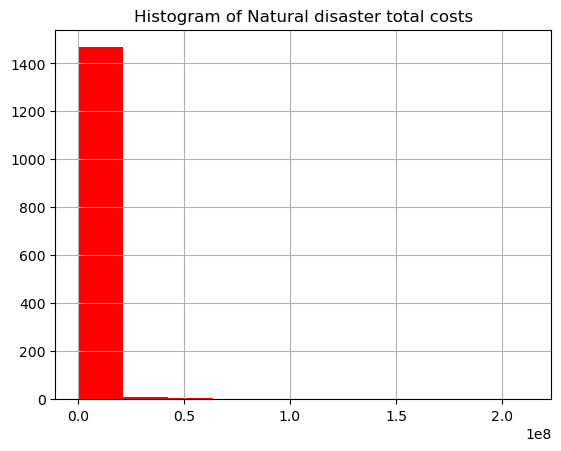

In [70]:
#histogram to explore skewness

skewValue = subset_clean["emdat_damage"].skew()
print("Skewness emdat_damage: ")
print(skewValue)

plt.hist(subset_clean["emdat_damage"],       # emdat_damage column as argument
         color = "r")                      # color in red
plt.title('Histogram of Natural disaster total costs')      # Title of my figure
plt.grid(True)        # Add grid
plt.show()            # Display the histogram



This histogram shows a horrible asymmetry on the right. Therefore I will use a log funciton on order to find a more clear normal distribution.

           country  year    epi_tcl  emdat_damage    ef_for  \
49     Afghanistan  1995  50.096477           0.0  0.092328   
50     Afghanistan  1996  50.096477           0.0  0.091649   
51     Afghanistan  1997  50.096477          10.0  0.091315   
52     Afghanistan  1998  50.096477       20000.0  0.090677   
53     Afghanistan  1999  50.096477           0.0  0.090286   
...            ...   ...        ...           ...       ...   
14898       Zambia  2010  32.174744           0.0  0.335574   
14899       Zambia  2011  31.638613           0.0  0.330334   
14900       Zambia  2012  29.751323           0.0  0.322839   
14901       Zambia  2013  29.327453           0.0  0.316146   
14902       Zambia  2014  29.385705           0.0  0.312044   

       emdat_damage_logarithm  
49                   0.000000  
50                   0.000000  
51                   2.302585  
52                   9.903488  
53                   0.000000  
...                       ...  
14898              

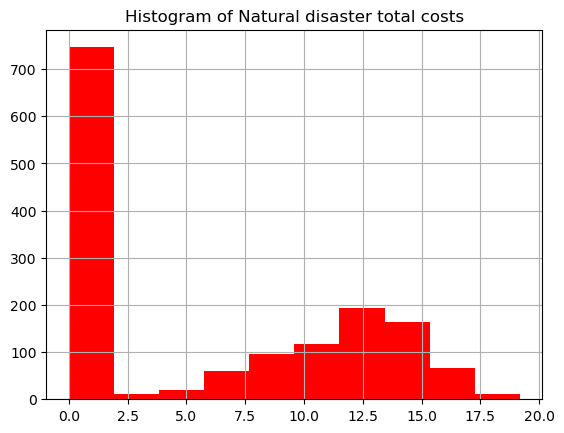

In [61]:
np.seterr(divide = 'ignore') #to ognore log divisions for the zero variable that I find in my observations
subset_clean["emdat_damage_logarithm"] = np.where(subset_clean["emdat_damage"]>0, np.log(subset_clean["emdat_damage"]),0)
#skewValue_log = subset_clean["emdat_damage"].skew()
print(subset_clean) 
skewValue_log = subset_clean["emdat_damage_logarithm"].skew()
#print(skewValue_log) 

#creating my histogram with log column
skewValue = subset_clean["emdat_damage_logarithm"].skew()
print("Skewness emdat_damage log: ")
print(skewValue_log)

plt.hist(subset_clean["emdat_damage_logarithm"],    
         color = "r")                      
plt.title('Histogram of Natural disaster total costs')     
plt.grid(True)        # Add grid
plt.show()            # Display the histogram


In [73]:
#Showing the avergae cost of natural disasters by country -map
emdat_map_log = subset_clean.groupby(["country"])["emdat_damage_logarithm"].mean().reset_index()
print (emdat_map_log)
emdat_map_log = emdat_map_log.rename(columns = {"emdat_damage_logarithm":"Natural Disaster cost (log)"})

emdat_map_log = emdat_map_log
fig = px.choropleth(emdat_map_log, locations = "country",
                    locationmode = "country names",
                    color = "Natural Disaster cost (log)",
                    hover_name="Natural Disaster cost (log)",
                    color_continuous_scale = px.colors.sequential.Plasma,)

fig.update_layout( title={                                # Add a title, centered on top
                            'text': "Cost of natural disaster by country in log",
                            'y':0.9,
                            'x':0.4,
                            'xanchor': 'center',
                            'yanchor': 'top'})
fig.show()

                              country  emdat_damage_logarithm
0                         Afghanistan                3.082268
1                              Angola                0.484755
2                           Argentina                6.502396
3                           Australia               13.527888
4                             Austria                9.399193
..                                ...                     ...
74  Venezuela, Bolivarian Republic of                4.892405
75                           Viet Nam               12.766837
76                              Yemen                2.607428
77                             Zambia                0.584582
78                           Zimbabwe                3.856721

[79 rows x 2 columns]


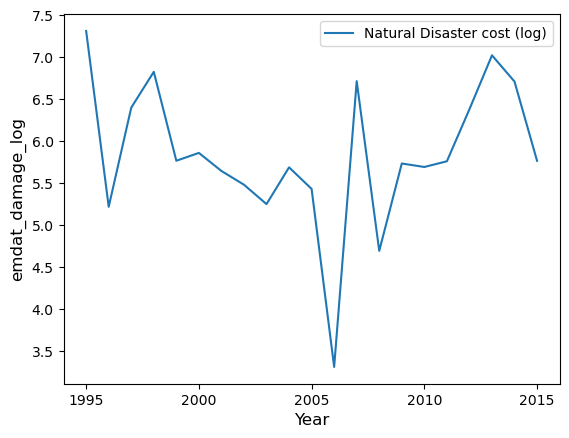

In [62]:
#Show development of cost of natural disaster over time - linegrap
emdat_line_log = subset_clean.groupby(["year"])["emdat_damage_logarithm"].mean().reset_index()
#emdat_line = emdat_line.rename(columns = {"emdat_damage":"Natural Disaster cost ($)"})
plt.plot(emdat_line_log["year"], emdat_line_log["emdat_damage_logarithm"], label = "Natural Disaster cost (log)")
plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(1995,2016,5))
plt.ylabel("emdat_damage_log", fontsize=12)  #adding the y label
plt.legend()
plt.show()

**2nd: Main explanatory variable epi_tcl**
- The Tree loss variable is a quantitative continous variable taking values from 0 to 100, measured in %. The % was measured as a five year moving average, with the reference year being 2000, and the data hasalready been log-tranformed. 
- The mean is around 36%, while the median is slightly below the mean with 35%.

Observations on the tables: 
1. Histogram: The data is slightly asymmetric on the right with a skewness of 1.4. Overall the densitiy is at 35% of the distribution. Interesting to state he is that a tree cover loss of above 90% happened in teh countries Niger and Yemen.
2. Map: The map shows Yemen and Niger as yellow spots, meaning they are deforesting at a enormous rate. Furthermore areas with high tree loss are Midafrica, Kazakhstan, Afghanistan, Pakistan, and Nepal.  
3. Line graph: The graph shows a high deforestation rate until 2005 with an average spike of the countries being at 38%. Starting from there until 2014 the percentage rate of tree loss dropped to about 33%. From there, we see another increase in 2015. 

In [63]:
subset_clean["epi_tcl"].describe()

count    1485.000000
mean       35.761996
std        13.548757
min         0.000000
25%        28.028606
50%        34.987208
75%        41.165055
max       100.000000
Name: epi_tcl, dtype: float64

Skewness epi_tcl: 
1.4228934779667815


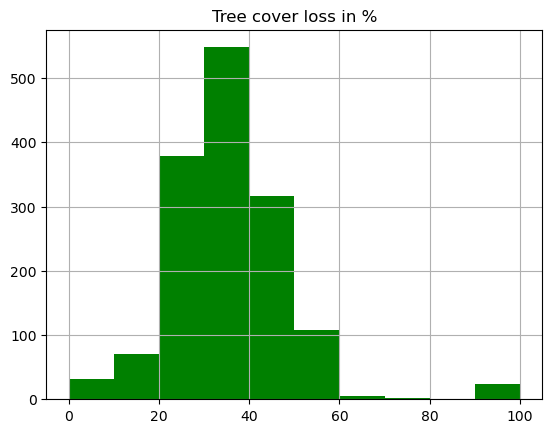

In [64]:

skewValue = subset_clean["epi_tcl"].skew()
print("Skewness epi_tcl: ")
print(skewValue)

plt.hist(subset_clean["epi_tcl"],       # epi_tcl column as argument
         color = "g")                      # color in green
plt.title('Tree cover loss in %')      # Title of my figure
plt.grid(True)        # Add grid
plt.show()            # Display the histogram



In [65]:
#Which countries have an average tree cover loss of above 90%?
subset_clean[subset_clean["epi_tcl"] > 90]["country"].unique()

array(['Niger', 'Yemen'], dtype=object)

In [78]:
#Showing the average tree cover loss by country -map
epi_tcl_map = subset_clean.groupby(["country"])["epi_tcl"].mean().reset_index()
print (epi_tcl_map)
epi_tcl_map = epi_tcl_map.rename(columns = {"epi_tcl":"Tree cover loss (%)"})

epi_tcl_map = epi_tcl_map
fig = px.choropleth(epi_tcl_map, locations = "country",
                    locationmode = "country names",
                    color = "Tree cover loss (%)",
                    hover_name="Tree cover loss (%)",
                    color_continuous_scale = px.colors.sequential.Plasma,)

fig.update_layout( title={                                # Add a title, centered on top
                            'text': "Tree cover loss  (%)",
                            'y':0.9,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'})
fig.show()

                              country     epi_tcl
0                         Afghanistan   53.659553
1                              Angola   41.975105
2                           Argentina   22.315166
3                           Australia   27.370818
4                             Austria   33.029364
..                                ...         ...
74  Venezuela, Bolivarian Republic of   41.795545
75                           Viet Nam   28.318731
76                              Yemen  100.000000
77                             Zambia   38.152806
78                           Zimbabwe   24.610981

[79 rows x 2 columns]


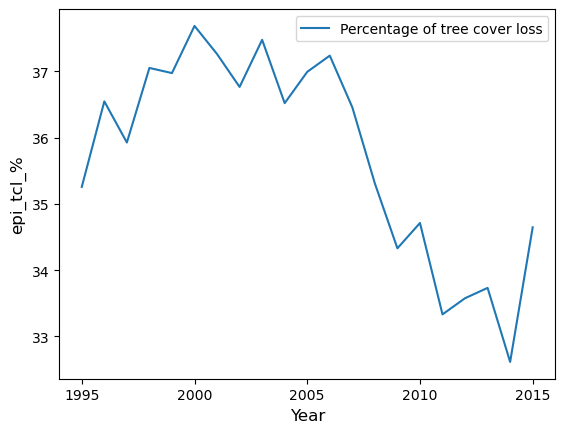

In [66]:
#Show the development of tree loss over time  -line graph
epi_tcl_line = subset_clean.groupby(["year"])["epi_tcl"].mean().reset_index()
#emdat_line = emdat_line.rename(columns = {"emdat_damage":"Natural Disaster cost ($)"})
plt.plot(epi_tcl_line["year"], epi_tcl_line["epi_tcl"], label = "Percentage of tree cover loss")
plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(1995,2016,5))
plt.ylabel("epi_tcl_%", fontsize=12)  #adding the y label
plt.legend()
plt.show()

**3rd: My other explanatory variable to explore heterogeneity ef_for**
- The Forest product footprint of consumption measured in global hectars (gha) per person is a quantitative continous variable taking values from 0.008 to 1.765.
- The mean is at around 0.37 gha, while the median is further below at 0.29.

Observations on the tables: 
1. Histogram: The data is slightly asymmetric on the right with a skewness of 1.7. Overall the densitiy is at 0.25 of the distribution.The countries with the highest forest foorprint per capita are: Australia, Canada, Chile, United States of America
2. Map: Since I have a lot of countries, I will once more show the data via a map. The map shows Australia, Canada, and the United States as the countries with the highest forest footprint per capita, coloured in yellow/orange.
3. Line graph: The graph shows a clear downward trend of forest footprint per person from 1995 until 2015. 

In [67]:
subset_clean["ef_for"].describe()

count    1485.000000
mean        0.371153
std         0.268041
min         0.008632
25%         0.184412
50%         0.293112
75%         0.488469
max         1.764944
Name: ef_for, dtype: float64

Skewness ef_for: 
1.7349494453830672


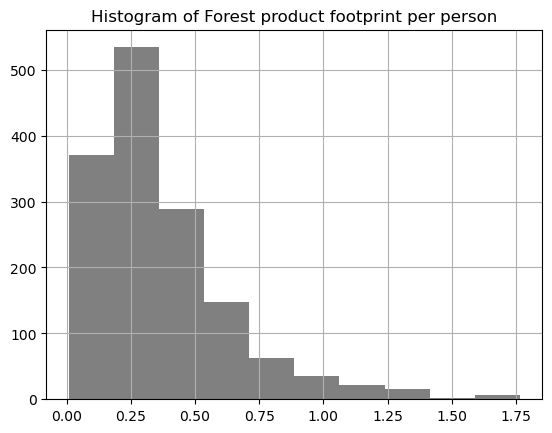

In [68]:

skewValue = subset_clean["ef_for"].skew()
print("Skewness ef_for: ")
print(skewValue)

plt.hist(subset_clean["ef_for"],       # ef_for column as argument
         color = "grey")                      # color in blue
plt.title('Histogram of Forest product footprint per person')      # Title of my figure
plt.grid(True)        # Add grid
plt.show()            # Display the histogram



In [69]:
subset_clean[subset_clean["ef_for"] > 1.0]["country"].unique()

array(['Australia', 'Canada', 'Chile', 'United States of America'],
      dtype=object)

In [70]:
#Showing the Forest product footprint in global hectars -map
ef_for_map = subset_clean.groupby(["country"])["ef_for"].mean().reset_index()
print (ef_for_map)
ef_for_map = ef_for_map.rename(columns = {"ef_for":"Forest product footprint (gha)"})

ef_for_map = ef_for_map
fig = px.choropleth(ef_for_map, locations = "country",
                    locationmode = "country names",
                    color = "Forest product footprint (gha)",
                    hover_name="Forest product footprint (gha)",
                    color_continuous_scale = px.colors.sequential.Plasma,)

fig.update_layout( title={                                # Add a title, centered on top
                            'text': "Forest product footprint (gha)",
                            'y':0.9,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'})
fig.show()

                              country    ef_for
0                         Afghanistan  0.080788
1                              Angola  0.113694
2                           Argentina  0.228671
3                           Australia  1.077754
4                             Austria  0.716575
..                                ...       ...
74  Venezuela, Bolivarian Republic of  0.133635
75                           Viet Nam  0.181272
76                              Yemen  0.024858
77                             Zambia  0.343940
78                           Zimbabwe  0.296396

[79 rows x 2 columns]


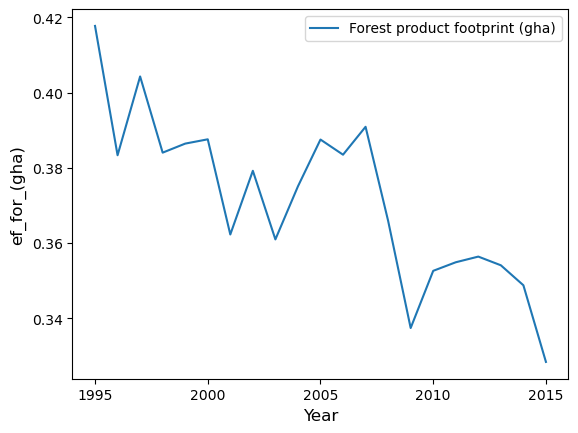

In [83]:
#Show development of Forst product footprint per capita - linegraph
emdat_line_log = subset_clean.groupby(["year"])["ef_for"].mean().reset_index()

plt.plot(emdat_line_log["year"], emdat_line_log["ef_for"], label = "Forest product footprint (gha)")
plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(1995,2016,5))
plt.ylabel("ef_for_(gha)", fontsize=12)  #adding the y label
plt.legend()
plt.show()

### Question 12: Cooking the ingredients together (bivariate analysis) <a class="anchor" id="question12"></a>

Considering the "nature" of your variables (continuous, categorical, binary, etc.), pick the right tool / tools for a preliminary bivariate analysis, i.e. correlation tables, bar/line graphs, scatter plots, etc. Use these tools to describe your preliminary bivariate analysis and your findings. **(3 points)**

Answer 12:

In [71]:
#Correlation between my variables
subset_clean_corr = subset_clean.loc[:,["emdat_damage_logarithm","epi_tcl","ef_for"]].corr()
subset_clean_corr

emdat_damage_logarithm   epi_tcl    ef_for
emdat_damage_logarithm                1.000000 -0.049442  0.143012
epi_tcl                              -0.049442  1.000000 -0.294562
ef_for                                0.143012 -0.294562  1.000000

In [72]:
heatmap_corr = px.imshow(
    subset_clean_corr.values.round(2),         # correlation matrix values, rounded at 2 decimals
    x=list(subset_clean_corr.columns),         # labeling x-axis
    y=list(subset_clean_corr.index),           # labeling y-axis
    text_auto=True,                   # adding my values to the graph
    aspect="auto"                     
)
heatmap_corr.update_xaxes(side="top")   # display labels on top (by default: bottom)
heatmap_corr.show()

**Looking at Heterogeneity:**\
First I am looking at the correlation between my three variables. I was expecting to find a positive correlation between my variables, however my data shows different. 
1. There is a negative correlation of 29% between tree loss and my 2nd explantory variable forest product footprint per capita. This means that the higher the forest product per capita is, the less tree coverage loss we see. Therefore, this variable is not a good indicator to show heterogenity to my outcome variable. 
2. I see a slight negative correlation between my explantory variabel and my outcome variable. This means there is no correlation between the tree cover loss in % and the damage that a natural disaster can cause. 
3. There is a 14% positive correlation between my outcome variable and my second explanatory variable. This means that the Forest product footprint tend to move the same direction with the cost of damage caused by natural disasters.

Text(0, 0.5, 'Log-transformed Cost of Damage by Natural Disasters')

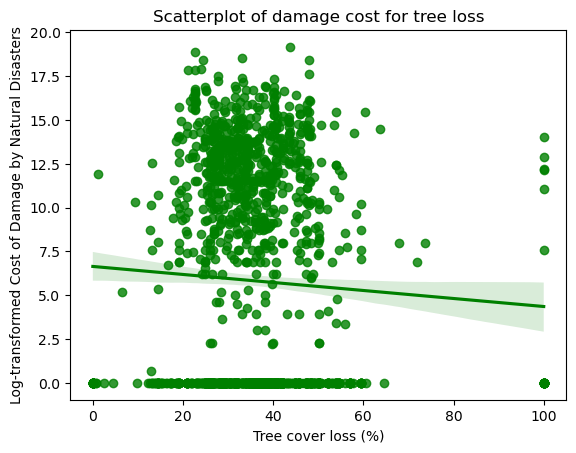

In [73]:
#Exploring the correlation with a simple scatter plot
sb.regplot(x = "epi_tcl", y = "emdat_damage_logarithm", data=subset_clean,color="g").set(title= "Scatterplot of damage cost for tree loss")
plt.xlabel("Tree cover loss (%)")
plt.ylabel("Log-transformed Cost of Damage by Natural Disasters")


Text(0, 0.5, 'Log-transformed Cost of Damage by Natural Disasters')

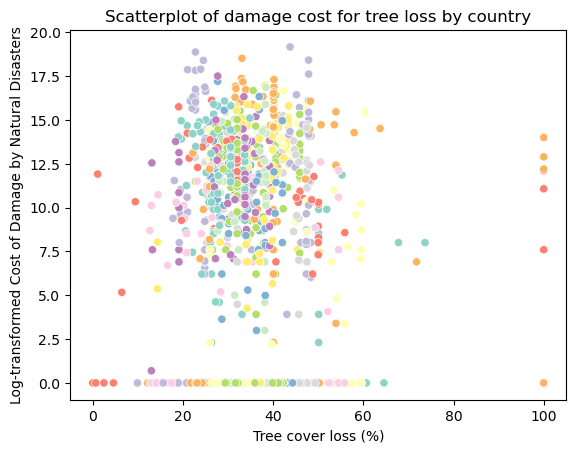

In [88]:
#Scatter plot with coloring based on 
sb.scatterplot(x="epi_tcl", y="emdat_damage_logarithm", legend=False, hue="country", palette="Set3", data=subset_clean).set(title= "Scatterplot of damage cost for tree loss by country")
plt.xlabel("Tree cover loss (%)")
plt.ylabel("Log-transformed Cost of Damage by Natural Disasters")



I can see that the dots are centered among one point mainly but at the same time they are spread vertically. This shows that tree cover loss in percentage is relatively stable within the country and varies mainly between 20-60% between countries. However there might be a slight trend between the change of cost of damage from natural disasters over time. In order to make more sense out of the data and deal with my highly asymmetic data with masses of zero, I will analyse the relationship with bar charts. 

With the following graphs I want to understand the relationship between my three variables. The y axis shows the extreme of natural disaster damage and the different bars represent different categories. The colored bars represent the low/high tree loss through and the x-axis represents low/high Forest product footprint.

In [74]:
#split the sample into categories based on tree loss coverage
subset_clean["epi_tcl_q"] = pd.qcut(subset_clean["epi_tcl"], [0, .25, .5, .75, 1.], labels=['25%','50%','75%','100%'],
                            retbins=False, precision=3, duplicates='raise')

#split the sample into buckets for world trade openness
subset_clean["ef_for_q"] = pd.qcut(subset_clean["ef_for"],[0, .25, .5, .75, 1.], labels=['q1','q2','q3','q4'],
                            retbins=False, precision=3, duplicates='raise')

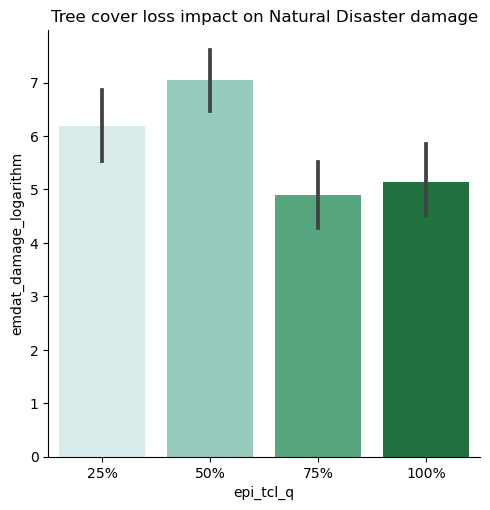

In [90]:
sb.catplot(x='epi_tcl_q', y='emdat_damage_logarithm', hue='epi_tcl_q', palette=("BuGn"), kind='bar', dodge=False, data=subset_clean).set(title="Tree cover loss impact on Natural Disaster damage")


Thre is no clear trend. When deforestation increases, there is no link to higher damage costs, caused by natural disasters. 

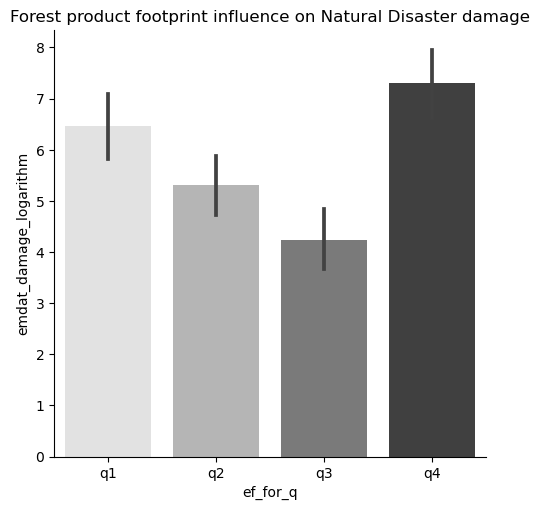

In [75]:
sb.catplot(x='ef_for_q', y='emdat_damage_logarithm', hue='ef_for_q', palette="Greys", kind='bar', dodge=False, data=subset_clean).set(title="Forest product footprint influence on Natural Disaster damage")

First we can see a downward trend of damage costs caused by increaseed forest product footprint. However, for extreme consumption in forest products measured in gha per person, there are high costs through damage of natural disasters.

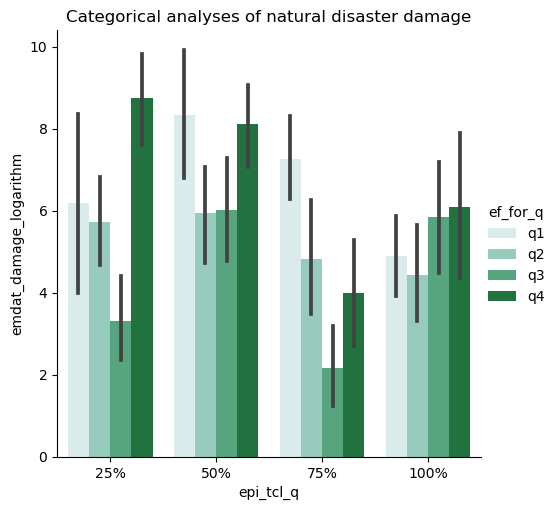

In [76]:
sb.catplot(x='epi_tcl_q', y='emdat_damage_logarithm', hue='ef_for_q', palette=("BuGn"), kind='bar', data=subset_clean).set(title="Categorical analyses of natural disaster damage")

**Actual outcome:**\
Let's make sense out of the data. Countries with very high deforestation have a slight positive relationship, meaning higher forest footprint -> higher tree coverage loss -> higher damage costs due to natural damages. For countries with lower deforestation (25 and 50% tree cover loss), an extreme low as well as extreme high forest footprint per capita shows high damage costs. Overall, the correlation is very vague and therefore no clear statement can be made.

### Question 13: Tasting the new recipe (conclusion) <a class="anchor" id="question13"></a>

Explain what you learned, the problem faced, what would you do next (you can suggest other data you would like to have etc). **(2 points)**

Answer 13:

**Expected Outcome:**\
During the analyses I have learned that my findings do not support my hypothesis. I was expecting that more tree coverage loss in a country would be positively correlated with the severeity that natural disasters have on livestock, crops and properties. Furthermore, I expected to measure the hetereogeneity with my 2nd explanatory variable. I thought of the linkage due to:

1. less vegetation can causes more extreme effects on the soil stability, so the area is more effected by floods or droughts which causes damage, measured in $.

2. tree coverage loss, mainly caused by deforestation are often used as crop or grassing areas for animals

3. Heterogeneity: if the forest product index is high per capita in a country there might be a positive impact onteh tree cover loss due to deforestation


**Possible limitations of my analyses:**
1.  tree cover loss is affected by several variables not just possible deforestation for wooden product consumption, but also due to export in other countries, as well as forest management, forest fires, and natural catastrophes which might impact the hetereogeneity.

2. I am expecting that my outcome variabel and my explanatory varibale are heterogene and therefore I would need independent variable to proof the causality in just one direction. It is possible that tree cover loss is influenced by natural disaster damage, since more buildings most be repaired. 

3. The data that I have varies between the observations per country between 15 and 21. Since I don't have values for certain year for some countries, this influences the total outcome on the total damage per country.

**Next steps:**\
The next steps would be to find another instrumental varibale that is more clearly linked to my explanatory variable in order to understand the heterogeneity between my outcome and my explanatory variable (for example forest fire or deforestation). After finding an IV, I will make a regression in order to see if I can reject or I must accept the hypotheses according to my p-value.
Furthermore, it will be interesting to analyse the relationship between different countries. Looking at the United States, as well as China, and Russia who are the biggest countries, I might find some results when doing this microanalyses.

